# Black Jack - Reinforcement Learning

The aim of this project is to introduce the concept of Reinforcement Learning through the familiar game of Black Jack. 

Reinforcement was introduced by Pavlov in the early 20th century and was described as the strengthening of a pattern or behavior due to an animal receiving a stimulus in an appropriate temporal relationship with another stimulus (Check Pavlov's dog studies). Pavlov believed that learning was an association of actions, observations of the environment and rewards.


Reinforcement Learning is now a branch of Machine Learning and is used in many problems where exposure and repetition is key to learning.

To run this Jupyter Notebook .ipynb file, I used:
 - Anaconda for Python (Highly recommend, very practical)
 - Environment with NumPy, Matplotlib and Seaborn installed

In [5]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

ModuleNotFoundError: No module named 'numpy'

# Playing Environment

First, we set the rules of the game for our learning agent to play with. We monitor at each step the actions taken by the agent (Hit, Stick), the state of the game (Dealer card, Player cards) and the rewards.

The rules of Black Jack were simplified for the purpose of the exercise (Ace is  1, no splitting and doubling), but still provides impressive results.

In [43]:
class BlackJack:
    
    def __init__(self, max_length=1000):
        self.max_length = max_length


    def reset(self):
        # Draw First Card
        cards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
        
        self.player_first_card_val = random.choice(cards) 
        self.dealer_first_card_val = random.choice(cards)

        self.player_sum = self.player_first_card_val
        self.dealer_sum = self.dealer_first_card_val

        self.state = [self.dealer_first_card_val, self.player_sum]

        self.player_goes_bust = False
        self.dealer_goes_bust = False

        self.ret = 0 #Return
        self.terminal = False
        self.t = 0 #Steps

        return self.state


    def step(self, action):
        cards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
        # actions: 1 - hit, 0 - stick
        r = 0

        if action == 1:
            self.player_card_val = random.choice(cards) # Value            
            
            #Sums player card value
            self.player_sum += self.player_card_val 
            
            #Checks if player bust
            self.player_goes_bust = self.check_go_bust(self.player_sum) 

            if self.player_goes_bust == 1: #If player bust, end
                r = -1
                self.terminal = True

        elif not self.terminal and action == 0: #Play dealer's turn
            while(self.dealer_sum < 17):
                self.dealer_card_val = random.choice(cards)                 

                self.dealer_sum += (self.dealer_card_val)
                self.dealer_goes_bust = self.check_go_bust(self.dealer_sum)

                
                if self.dealer_goes_bust == 1:
                    r = 1
                    self.terminal = True
                    
                else:
                    self.terminal = True
                    if self.player_sum > self.dealer_sum: r = 1
                    elif self.player_sum < self.dealer_sum: r = -1
                    else: r = 0
                        

        self.t += 1 #Counts steps
        self.ret += r #Adds return
        
        
        if self.terminal: 
            return 'Terminal', r, self.terminal
        else:
            self.state[1] = self.player_sum
            return self.state, r, self.terminal


    def check_go_bust(self, Sum): #Checks if person goes bust
        return bool(Sum > 21)

# Monte-Carlo - Algorithm

In [44]:
## Monte Carlo -- one episode
def monte_carlo(Q, Returns, count_state, count_state_action):
    appeared = np.zeros([10, 21, 2], dtype=int)

    actions = []
    rewards = []
    states = []
    s = env.reset() #Resets states and assigns random start cards to s (dealer, player)
    states.append(s[:])
    


    while True:
        action_greedy = Q[s[0]-1, s[1]-1, :].argmax()
        count_state[s[0]-1, s[1]-1] += 1
        epsilon = count_constant / float(count_constant + count_state[s[0]-1, s[1]-1]) #Epsilon greedy
        action = np.random.choice([action_greedy, 1 - action_greedy], p=[1. - epsilon/2., epsilon/2.])
        actions.append(action)

        s, r, term = env.step(action=action)
        rewards.append(r)
        

        if term: 
            break
        else: 
            states.append(s[:])
            
            
# Check the playing environment (rules) works correctly
#     print('Hits', len(states)-1)
#     print('Actions', actions)
#     print('States', states)
#     print('Rewards', rewards)
#     print('')

    
    for t in range(len(states)):
        count_state_action[states[t][0]-1, states[t][1]-1, actions[t]] += 1
    
        if appeared[states[t][0]-1, states[t][1]-1, actions[t]] == 0:
            Returns[states[t][0]-1, states[t][1]-1, actions[t]] = rewards[-1]
            Q[states[t][0]-1, states[t][1]-1, actions[t]] += (1/count_state_action[states[t][0]-1, states[t][1]-1, actions[t]]) * (Returns[states[t][0]-1, states[t][1]-1, actions[t]] - Q[states[t][0]-1, states[t][1]-1, actions[t]])    
        
        appeared[states[t][0]-1, states[t][1]-1, actions[t]] = 1
        
    return Q, Returns, count_state, count_state_action, rewards[-1]

In [168]:
## Monte Carlo
Q_MC = np.zeros([10, 21, 2]) # Q(s, a)
Returns = np.zeros([10, 21, 2]) # empirical first-visit returns
count_state_action = np.zeros([10, 21, 2], dtype=int) # N(s, a)
count_state = np.zeros([10, 21], dtype=int) # N(s)
count_constant = 100

traces_reward = []

# Over 100000 episodes is reasonable for learning
n_episodes = 100000

env = BlackJack()

for i_epi in range(n_episodes):
    Q_MC, Returns, count_state, count_state_action, trace_reward = monte_carlo(Q_MC, Returns, count_state, count_state_action)
    traces_reward.append(trace_reward)
    
    if (i_epi+1) % (n_episodes/10) == 0:
        print(int(100*(i_epi+1)/n_episodes), '%')

V_MC = Q_MC.max(axis=2)

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


# Monte-Carlo - Optimal Value Function

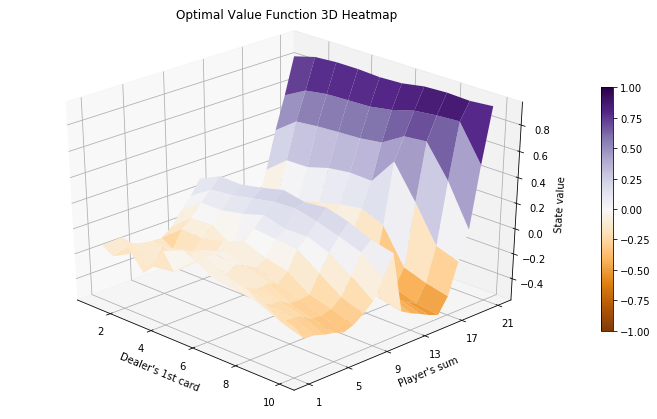

In [169]:
## Monte Carlo -- plot
s1 = np.arange(10)+1
s2 = np.arange(21)+1
ss1, ss2 = np.meshgrid(s1, s2, indexing='ij')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(ss1, ss2, V_MC, vmin = -1, vmax = 1, cmap=cm.PuOr)

ax.set_xlabel("Dealer's 1st card")
ax.set_ylabel("Player's sum")
ax.set_zlabel("State value")
ax.set_title("Optimal Value Function 3D Heatmap\n")
plt.yticks([1, 5, 9, 13, 17, 21])
fig.colorbar(surf, shrink=0.6)
fig.tight_layout()

ax.view_init(azim=-45)

plt.show()

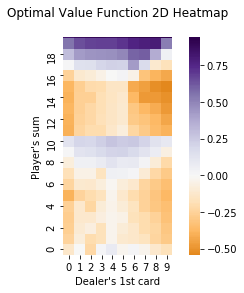

In [170]:
sns.heatmap(V_MC.T, center=0, square=True, cmap=cm.PuOr)
plt.ylim([0,20])
plt.xlabel("Dealer's 1st card")
plt.ylabel("Player's sum")
plt.title("Optimal Value Function 2D Heatmap\n")

plt.show()

# Monte-Carlo - Reward Vs Episodes (Learning)

We can observe our RL agent learn through the episodes, as he transitions from a more curious strategy (exploration) to a more greedy one (learning). Ultimately, he loses less and less against the Dealer which is a great achievement (cumulative mean reward steadily goes up). 

In [179]:
MC_cumulative_reward = []
MC_mean = []

for batch in range(n_episodes):
    if batch == 0:
        MC_cumulative_reward.append(traces_reward[batch])
        MC_mean.append(traces_reward[batch])
    else:
        MC_cumulative_reward.append(MC_cumulative_reward[batch-1] + traces_reward[batch])
        MC_mean.append(MC_cumulative_reward[batch]/len(MC_cumulative_reward))

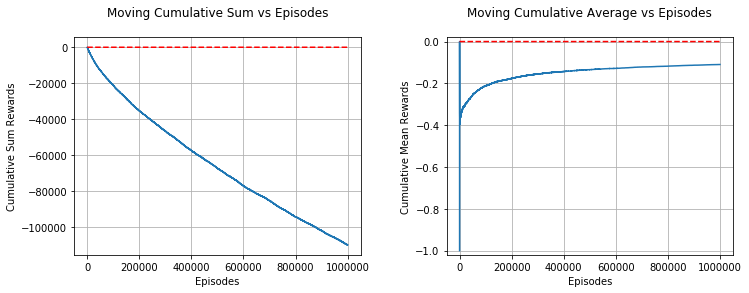

In [186]:
line1 = np.zeros(n_episodes)

plt.subplot(121)
plt.plot(MC_cumulative_reward)
plt.plot(line1,'r--')
plt.ylabel('Cumulative Sum Rewards')
plt.xlabel('Episodes')
plt.title('Moving Cumulative Sum vs Episodes\n')
plt.grid()

plt.subplot(122)
plt.plot(MC_mean)
plt.plot(line1,'r--')
plt.ylim(-1.02, 0.02)
plt.ylabel('Cumulative Mean Rewards')
plt.xlabel('Episodes')
plt.title('Moving Cumulative Average vs Episodes\n')
plt.grid()

plt.subplots_adjust(left=None, bottom=None, right=1.65, top=None, wspace=0.3, hspace=None)

plt.show()